# Seaborn Visualizations Tutorial

### Import Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%reload_ext autoreload
%autoreload


### Import Data

In [5]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'taxis', 'tips', 'titanic']


In [8]:
crash_df=sns.load_dataset("car_crashes")
crash_df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


Distribution Plot for univariate variables

## Distribution Plots

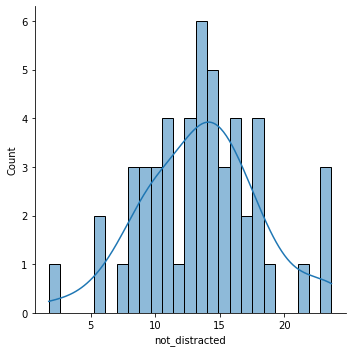

In [13]:
sns.displot(crash_df["not_distracted"], kde=True, bins=25)

### Joint Plot

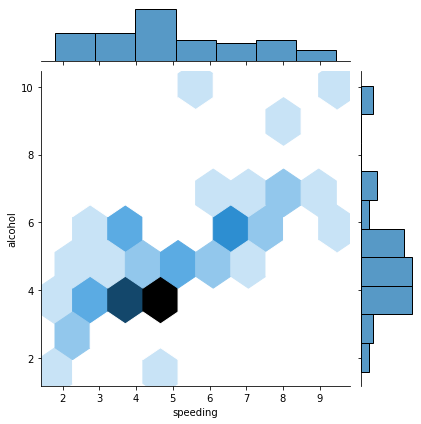

In [16]:
sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind='hex')

### KDE plots

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

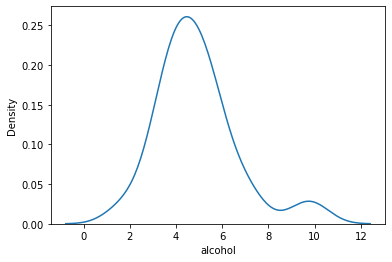

In [18]:
sns.kdeplot(crash_df['alcohol'])

### Pair Plots

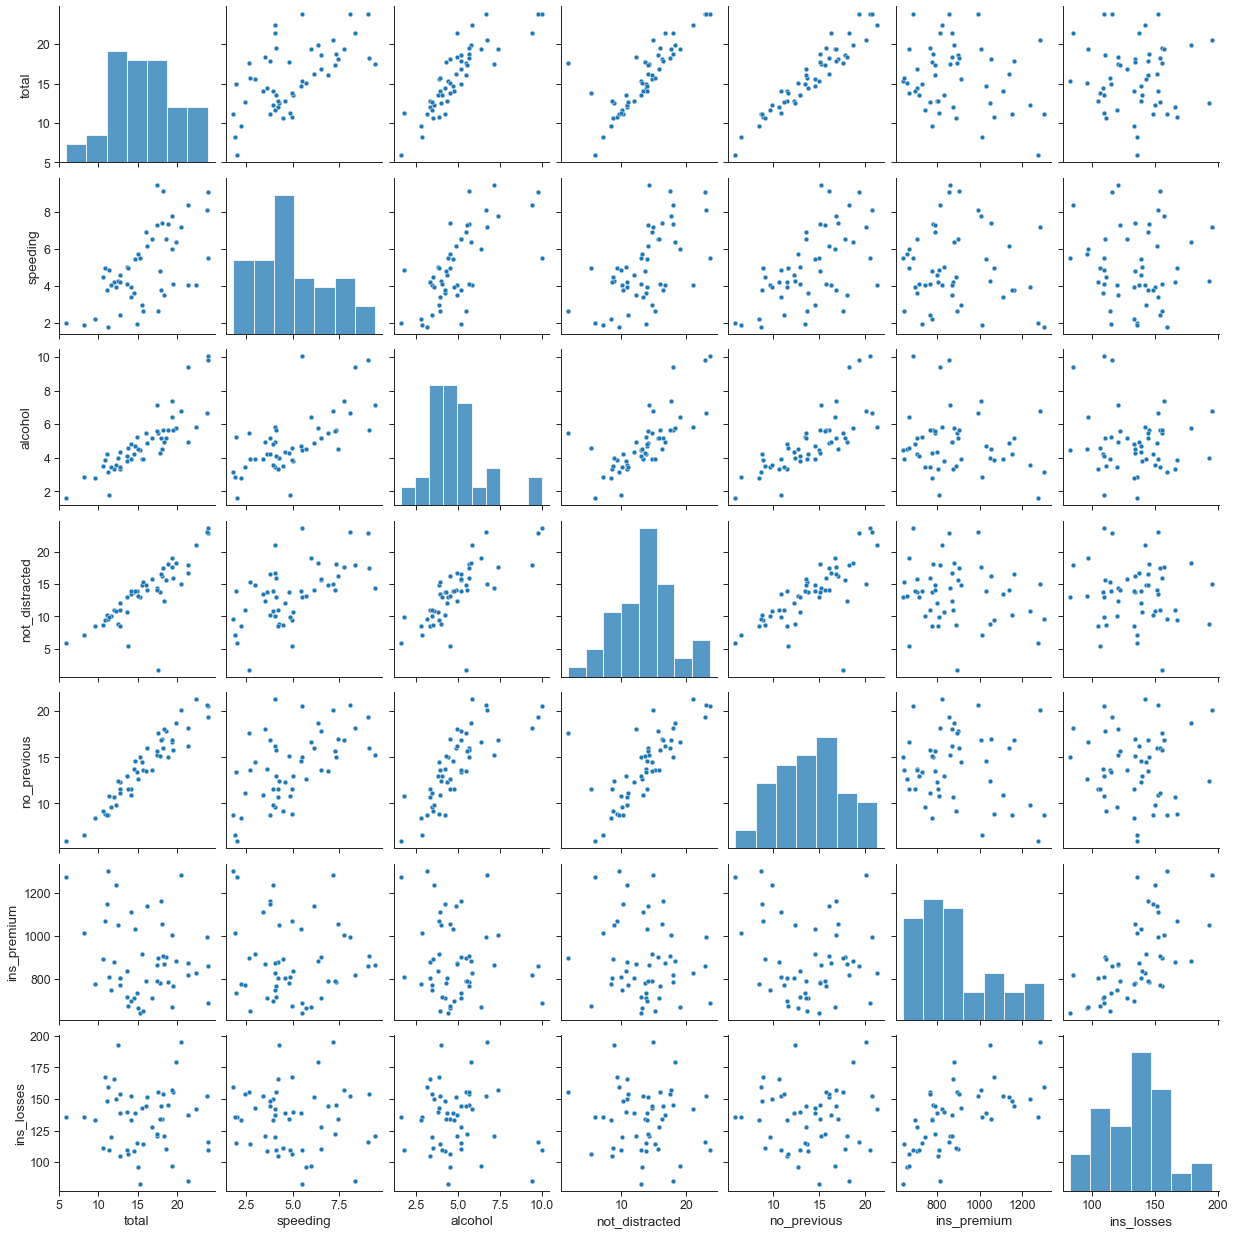

In [149]:
sns.pairplot(crash_df)

In [22]:
tips_df=sns.load_dataset('tips')
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


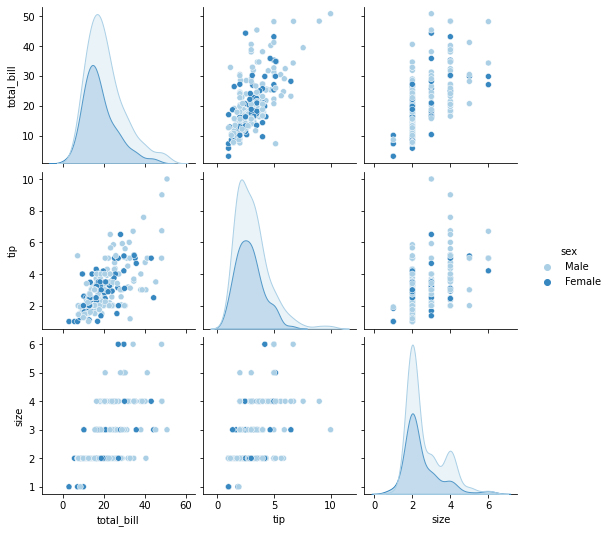

In [23]:
sns.pairplot(tips_df, hue='sex', palette='Blues')

### Rug Plots

<AxesSubplot:xlabel='tip'>

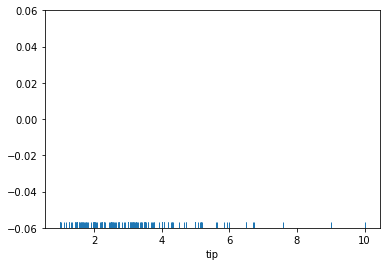

In [25]:
sns.rugplot(tips_df['tip'])

### Styling

<Figure size 7200x1440 with 0 Axes>

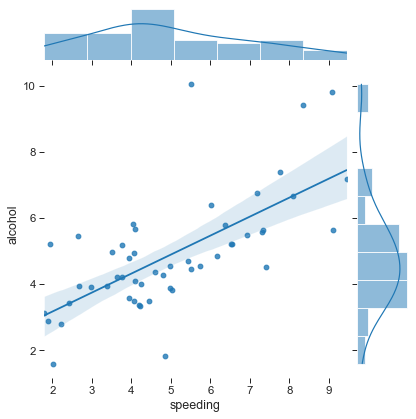

In [40]:
sns.set_style('ticks')
plt.figure(figsize=(100,20))
sns.set_context('paper', font_scale=1.3)
sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind='reg')
sns.despine(left=True, bottom=True)

## Categorical variables

### Barplots

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

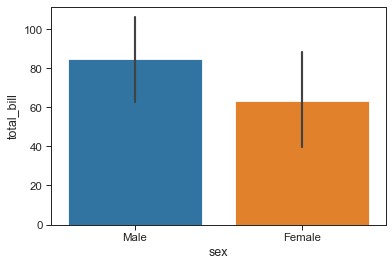

In [44]:
sns.barplot(x='sex', y='total_bill', data=tips_df, estimator=np.var)

### Count Plots

<AxesSubplot:xlabel='sex', ylabel='count'>

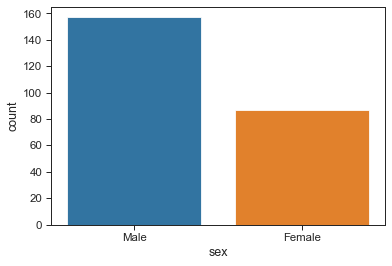

In [45]:
sns.countplot(x='sex', data=tips_df)

### Box plot

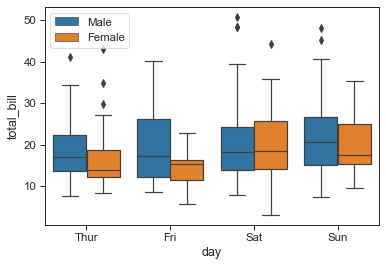

In [48]:
sns.boxplot(x='day', y='total_bill', data=tips_df, hue='sex')
plt.legend(loc=0)

### Violin plot

<AxesSubplot:xlabel='day', ylabel='total_bill'>

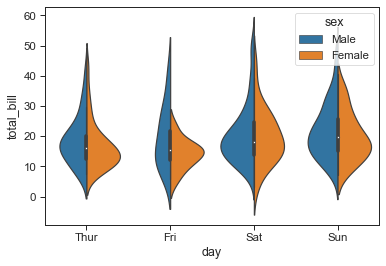

In [51]:
sns.violinplot(x='day', y='total_bill', data=tips_df, hue='sex', split=True)

### Strip Plots

<AxesSubplot:xlabel='day', ylabel='total_bill'>

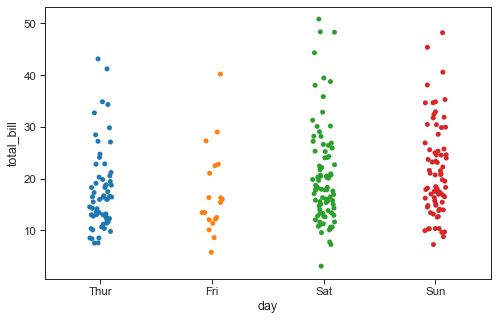

In [54]:
plt.figure(figsize=(8,5))
sns.stripplot(x='day', y='total_bill', data=tips_df)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

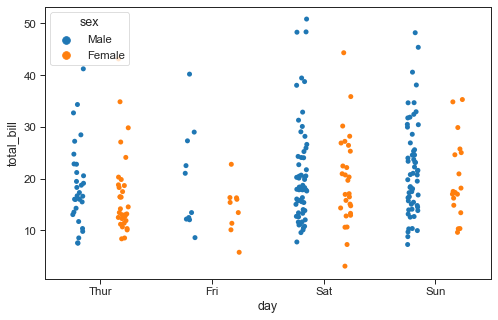

In [56]:
plt.figure(figsize=(8,5))
sns.stripplot(x='day', y='total_bill', data=tips_df, hue='sex', dodge=True)

### Swarm plot

<AxesSubplot:xlabel='day', ylabel='total_bill'>

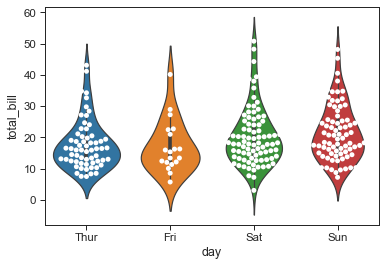

In [58]:
sns.violinplot(x='day', y='total_bill', data=tips_df)
sns.swarmplot(x='day', y='total_bill', data=tips_df, color='white')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

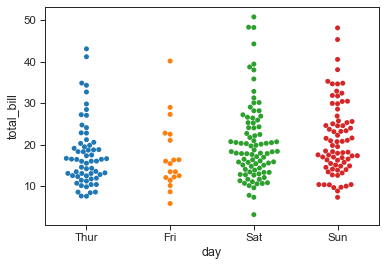

In [59]:
sns.swarmplot(x='day', y='total_bill', data=tips_df)

### Palettes

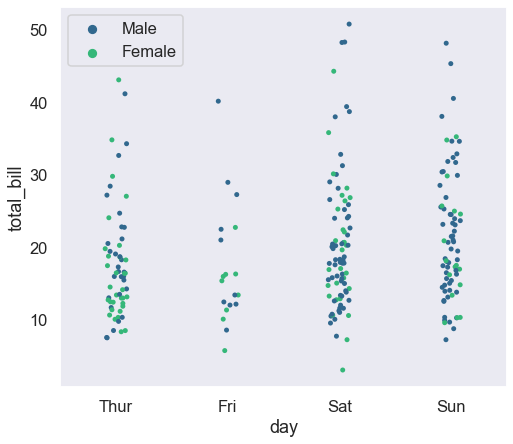

In [67]:
plt.figure(figsize=(8,7))
sns.set_style('dark')
sns.set_context('talk')
sns.stripplot(x='day', y='total_bill', data=tips_df, hue='sex', palette='viridis')
plt.legend(loc='upper left')
# check matplotlib legends and mapcolors 

## Matrix plots

### Heatmaps

<AxesSubplot:>

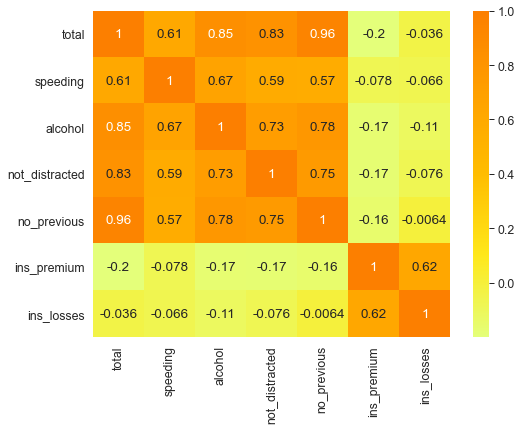

In [69]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)
crash_mx=crash_df.corr()
sns.heatmap(crash_mx, annot=True, cmap='Wistia')

In [94]:
flights= sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


### Cluster Map

In [91]:
iris=sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


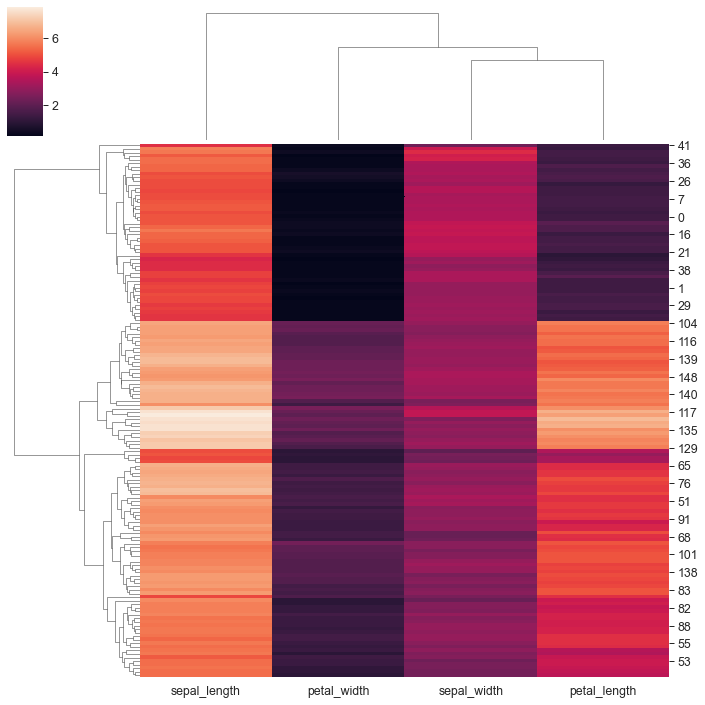

In [92]:
species=iris.pop('species')
sns.clustermap(iris)


### Pair Grid

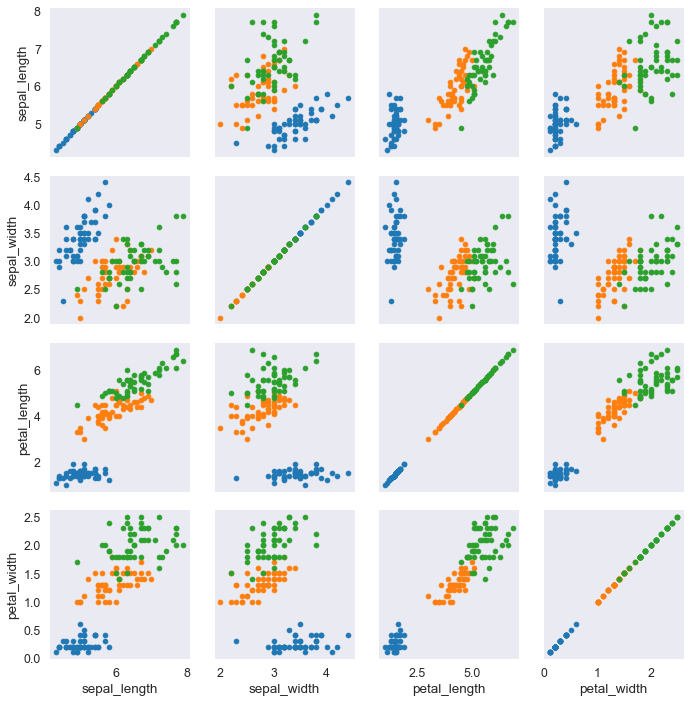

In [112]:
iris=sns.load_dataset('iris')
iris_g=sns.PairGrid(iris, hue='species')
iris_g.map(plt.scatter)

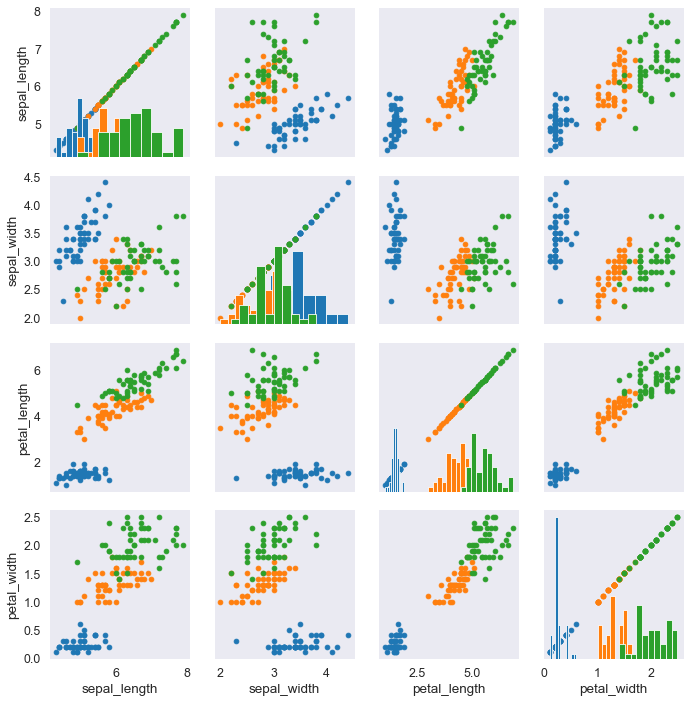

In [102]:
iris_g.map_diag(plt.hist)

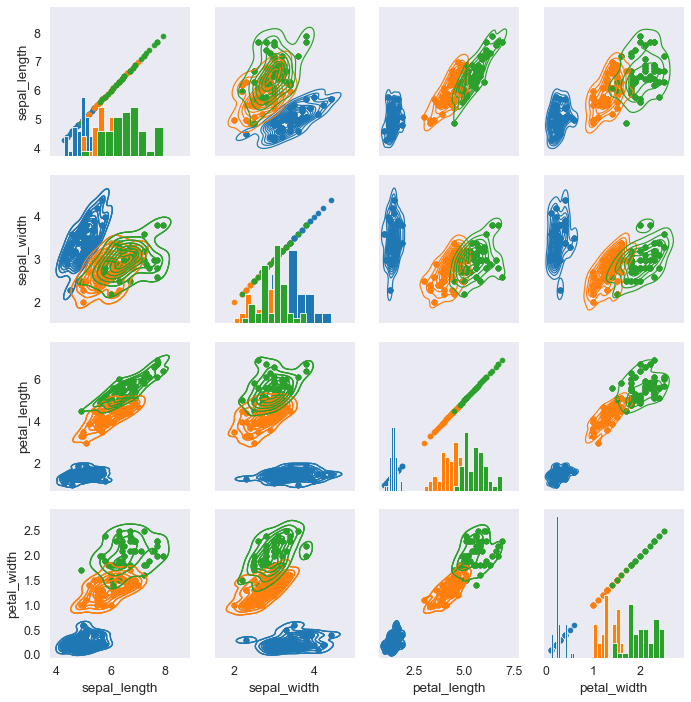

In [109]:
iris_g.map_offdiag(plt.scatter)
iris_g.map_upper(sns.kdeplot)
iris_g.map_lower(sns.kdeplot)
iris_g

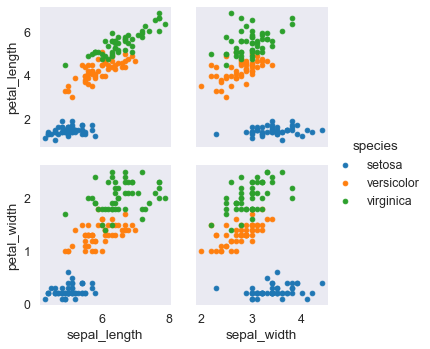

In [113]:
iris_g= sns.PairGrid(iris, hue='species',x_vars=['sepal_length','sepal_width'], y_vars=['petal_length','petal_width'], palette=)
iris_g.map(plt.scatter)
iris_g.add_legend()

### Facet Grid

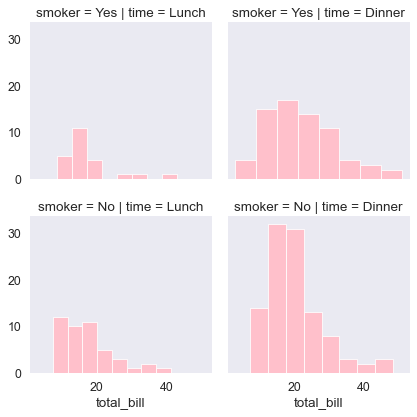

In [123]:
tips_fg=sns.FacetGrid(tips_df, col='time', row='smoker')
tips_fg.map(plt.hist, 'total_bill', bins=8, color='pink')

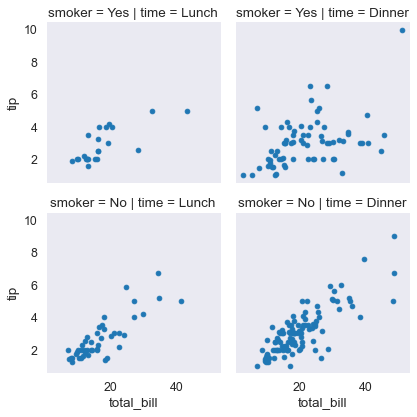

In [121]:
tips_fg.map(plt.scatter, 'total_bill', 'tip')

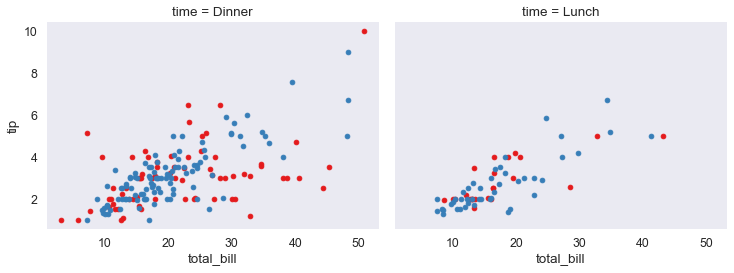

In [125]:
tips_fg1=sns.FacetGrid(tips_df, col='time', hue='smoker', height= 4, aspect=1.3, col_order=['Dinner', 'Lunch'], palette='Set1')
tips_fg1.map(plt.scatter,'total_bill', 'tip') 

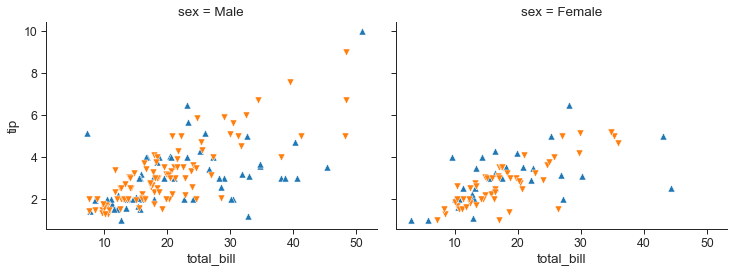

In [146]:
Kws= dict(s=50, linewidth=.5, edgecolor='w')
tips_fg2=sns.FacetGrid(tips_df, col='sex', hue='smoker', height= 4, aspect=1.3, hue_order=['Yes', 'No'], hue_kws = dict(marker =['^', 'v']))
tips_fg2.map(plt.scatter,'total_bill', 'tip', **Kws )                                                                                                                           

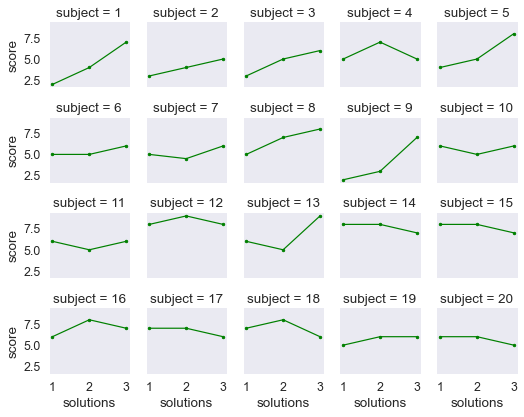

In [135]:
att_df= sns.load_dataset('attention')
att_fg=sns.FacetGrid(att_df, col='subject', col_wrap=5, height=1.5, )
att_fg.map(plt.plot, 'solutions', 'score', marker='.', color='green')

### Regression Plots

<Figure size 576x432 with 0 Axes>

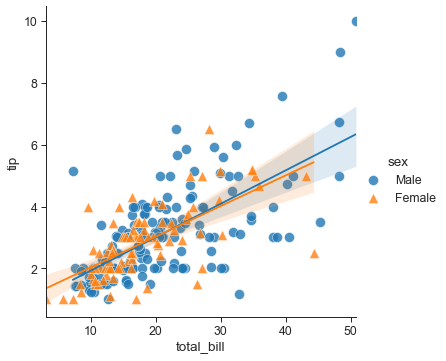

In [140]:
plt.figure(figsize=(8,6))
sns.set_style('ticks')
sns.set_context('paper', font_scale=1.4)
sns.lmplot(x='total_bill', y='tip', hue='sex', data=tips_df, markers=['o','^'], scatter_kws={'s':100,'linewidth':0.5, 'edgecolor':'w'})

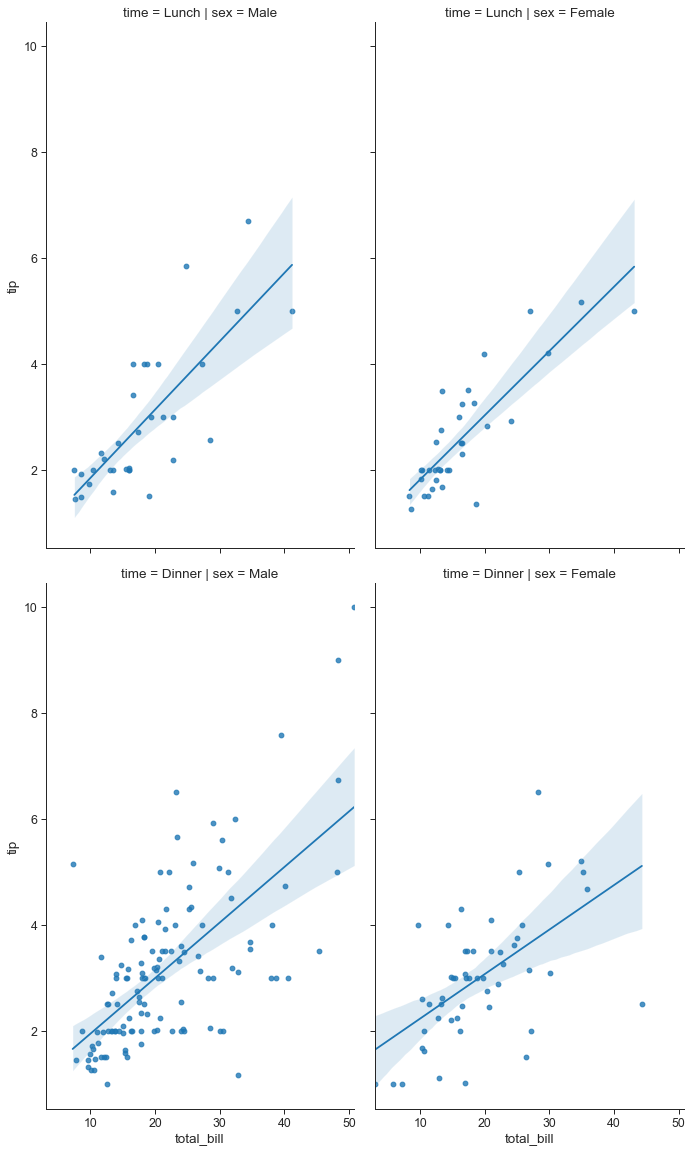

In [145]:
sns.set_context('paper', font_scale=1.4)
sns.lmplot(x='total_bill', y='tip', col='sex', row='time', data=tips_df, height=8, aspect=0.6)